In [107]:
import geopandas as gpd
import pandas as pd
import contextily as cx
import numpy as np
from pointpats import centrography
from shapely.geometry import Point
import matplotlib.pyplot as plt
from scipy import stats
import shapely as shapely
import h3 as h3
from tobler.util import h3fy
from pysal.lib import weights
from pysal.explore import esda
from splot.esda import plot_local_autocorrelation

need to define gdf before running the below

temp. oxygen, ph, turbidity

In [47]:
df = gpd.read_file(r"C:\Users\p7j5p\Documents\Paul's reports\696 documents\4states.csv")

In [76]:
df1 = df[['ActivityStartTime/Time','ActivityStartDate','CharacteristicName', 'MonitoringLocationIdentifier', 'ResultTemperatureBasisText', 'ResultMeasureValue', 'ResultMeasure/MeasureUnitCode']]

In [78]:
df1 = df1.loc[(df1['CharacteristicName']=="Turbidity") | (df1['CharacteristicName']=="Dissolved oxygen (DO)") | (df1['CharacteristicName']=="Temperature, water") | (df1['CharacteristicName']=="ph")]

In [79]:
df1

,ActivityStartTime/Time,ActivityStartDate,CharacteristicName,MonitoringLocationIdentifier,ResultTemperatureBasisText,ResultMeasureValue,ResultMeasure/MeasureUnitCode
13,10:28:00,2021-04-19,Dissolved oxygen (DO),21FLCOMI_WQX-HUMMINGBIRD,,3.07,mg/l
20,10:08:00,2021-04-21,Dissolved oxygen (DO),MORONGO1_WQX-M001,,9.54,mg/l
34,10:26:00,2021-05-10,Dissolved oxygen (DO),21FLSFWM_WQX-5598,,6.12,mg/l
55,09:00:00,2021-04-12,"Temperature, water",21FLORAN_WQX-HBH,,20.7,deg C
57,10:53:00,2021-05-17,Dissolved oxygen (DO),21FLSJWM_WQX-45556,,5.49,mg/l
...,...,...,...,...,...,...,...
1056106,15:17:00,2021-10-16,"Temperature, water",USGS-08155395,,22.0,deg C
1056150,15:17:00,2021-10-16,Turbidity,USGS-08155395,,7.0,FNU
1056163,10:59:00,2021-12-06,"Temperature, water",USGS-11453000,,11.7,deg C
1056171,08:30:00,2021-12-20,"Temperature, water",USGS-11066460,,13.1,deg C


In [80]:
sites = gpd.read_file(r"C:\Users\p7j5p\Documents\Paul's reports\696 documents\water data\narrowresult-raw\station.csv")

In [81]:
sites = sites[['OrganizationFormalName', 'MonitoringLocationIdentifier', 'LongitudeMeasure', 'LatitudeMeasure']]

In [82]:
gdf = pd.merge(sites, df1, on='MonitoringLocationIdentifier', how='right')

In [84]:
gdf['geometry'] = gpd.points_from_xy(gdf['LongitudeMeasure'], gdf['LatitudeMeasure'])

In [110]:
gdf1 = gpd.GeoDataFrame(gdf, geometry='geometry')

In [85]:
gdf

,OrganizationFormalName,MonitoringLocationIdentifier,LongitudeMeasure,LatitudeMeasure,ActivityStartTime/Time,ActivityStartDate,CharacteristicName,ResultTemperatureBasisText,ResultMeasureValue,ResultMeasure/MeasureUnitCode,geometry
0,CITY OF MARCO ISLAND,21FLCOMI_WQX-HUMMINGBIRD,-81.7036653660,25.9434511230,10:28:00,2021-04-19,Dissolved oxygen (DO),,3.07,mg/l,POINT (-81.70367 25.94345)
1,Morongo Band of Mission Indians,MORONGO1_WQX-M001,-116.7972000000,33.9774200000,10:08:00,2021-04-21,Dissolved oxygen (DO),,9.54,mg/l,POINT (-116.79720 33.97742)
2,South Florida Water Management District,21FLSFWM_WQX-5598,-81.4622900000,28.0519608330,10:26:00,2021-05-10,Dissolved oxygen (DO),,6.12,mg/l,POINT (-81.46229 28.05196)
3,Orange County Environmental (Florida),21FLORAN_WQX-HBH,-81.3426600000,28.6244810000,09:00:00,2021-04-12,"Temperature, water",,20.7,deg C,POINT (-81.34266 28.62448)
4,St. Johns River Water Management District,21FLSJWM_WQX-45556,-81.6977777780,29.4747222220,10:53:00,2021-05-17,Dissolved oxygen (DO),,5.49,mg/l,POINT (-81.69778 29.47472)
...,...,...,...,...,...,...,...,...,...,...,...
105397,USGS Texas Water Science Center,USGS-08155395,-97.7742222000000,30.26366667000000,15:17:00,2021-10-16,"Temperature, water",,22.0,deg C,POINT (-97.77422 30.26367)
105398,USGS Texas Water Science Center,USGS-08155395,-97.7742222000000,30.26366667000000,15:17:00,2021-10-16,Turbidity,,7.0,FNU,POINT (-97.77422 30.26367)
105399,USGS California Water Science Center,USGS-11453000,-121.6441266000000,38.67768170000000,10:59:00,2021-12-06,"Temperature, water",,11.7,deg C,POINT (-121.64413 38.67768)
105400,USGS California Water Science Center,USGS-11066460,-117.4483806000000,33.96862566000000,08:30:00,2021-12-20,"Temperature, water",,13.1,deg C,POINT (-117.44838 33.96863)


In [112]:
gdf1.crs = 4326

In [114]:
print(gdf1.crs)

epsg:4326


In [113]:
gdf1.set_crs(4326)

,OrganizationFormalName,MonitoringLocationIdentifier,LongitudeMeasure,LatitudeMeasure,ActivityStartTime/Time,ActivityStartDate,CharacteristicName,ResultTemperatureBasisText,ResultMeasureValue,ResultMeasure/MeasureUnitCode,geometry
0,CITY OF MARCO ISLAND,21FLCOMI_WQX-HUMMINGBIRD,-81.7036653660,25.9434511230,10:28:00,2021-04-19,Dissolved oxygen (DO),,3.07,mg/l,POINT (-81.70367 25.94345)
1,Morongo Band of Mission Indians,MORONGO1_WQX-M001,-116.7972000000,33.9774200000,10:08:00,2021-04-21,Dissolved oxygen (DO),,9.54,mg/l,POINT (-116.79720 33.97742)
2,South Florida Water Management District,21FLSFWM_WQX-5598,-81.4622900000,28.0519608330,10:26:00,2021-05-10,Dissolved oxygen (DO),,6.12,mg/l,POINT (-81.46229 28.05196)
3,Orange County Environmental (Florida),21FLORAN_WQX-HBH,-81.3426600000,28.6244810000,09:00:00,2021-04-12,"Temperature, water",,20.7,deg C,POINT (-81.34266 28.62448)
4,St. Johns River Water Management District,21FLSJWM_WQX-45556,-81.6977777780,29.4747222220,10:53:00,2021-05-17,Dissolved oxygen (DO),,5.49,mg/l,POINT (-81.69778 29.47472)
...,...,...,...,...,...,...,...,...,...,...,...
105397,USGS Texas Water Science Center,USGS-08155395,-97.7742222000000,30.26366667000000,15:17:00,2021-10-16,"Temperature, water",,22.0,deg C,POINT (-97.77422 30.26367)
105398,USGS Texas Water Science Center,USGS-08155395,-97.7742222000000,30.26366667000000,15:17:00,2021-10-16,Turbidity,,7.0,FNU,POINT (-97.77422 30.26367)
105399,USGS California Water Science Center,USGS-11453000,-121.6441266000000,38.67768170000000,10:59:00,2021-12-06,"Temperature, water",,11.7,deg C,POINT (-121.64413 38.67768)
105400,USGS California Water Science Center,USGS-11066460,-117.4483806000000,33.96862566000000,08:30:00,2021-12-20,"Temperature, water",,13.1,deg C,POINT (-117.44838 33.96863)


In [115]:
gdf1['ResultMeasureValue'] = pd.to_numeric(gdf['ResultMeasureValue'], errors='coerce')

In [116]:
gdf1 = gdf1.dropna(subset=['ResultMeasureValue'])

In [117]:
gdf1

,OrganizationFormalName,MonitoringLocationIdentifier,LongitudeMeasure,LatitudeMeasure,ActivityStartTime/Time,ActivityStartDate,CharacteristicName,ResultTemperatureBasisText,ResultMeasureValue,ResultMeasure/MeasureUnitCode,geometry
0,CITY OF MARCO ISLAND,21FLCOMI_WQX-HUMMINGBIRD,-81.7036653660,25.9434511230,10:28:00,2021-04-19,Dissolved oxygen (DO),,3.07,mg/l,POINT (-81.70367 25.94345)
1,Morongo Band of Mission Indians,MORONGO1_WQX-M001,-116.7972000000,33.9774200000,10:08:00,2021-04-21,Dissolved oxygen (DO),,9.54,mg/l,POINT (-116.79720 33.97742)
2,South Florida Water Management District,21FLSFWM_WQX-5598,-81.4622900000,28.0519608330,10:26:00,2021-05-10,Dissolved oxygen (DO),,6.12,mg/l,POINT (-81.46229 28.05196)
3,Orange County Environmental (Florida),21FLORAN_WQX-HBH,-81.3426600000,28.6244810000,09:00:00,2021-04-12,"Temperature, water",,20.70,deg C,POINT (-81.34266 28.62448)
4,St. Johns River Water Management District,21FLSJWM_WQX-45556,-81.6977777780,29.4747222220,10:53:00,2021-05-17,Dissolved oxygen (DO),,5.49,mg/l,POINT (-81.69778 29.47472)
...,...,...,...,...,...,...,...,...,...,...,...
105397,USGS Texas Water Science Center,USGS-08155395,-97.7742222000000,30.26366667000000,15:17:00,2021-10-16,"Temperature, water",,22.00,deg C,POINT (-97.77422 30.26367)
105398,USGS Texas Water Science Center,USGS-08155395,-97.7742222000000,30.26366667000000,15:17:00,2021-10-16,Turbidity,,7.00,FNU,POINT (-97.77422 30.26367)
105399,USGS California Water Science Center,USGS-11453000,-121.6441266000000,38.67768170000000,10:59:00,2021-12-06,"Temperature, water",,11.70,deg C,POINT (-121.64413 38.67768)
105400,USGS California Water Science Center,USGS-11066460,-117.4483806000000,33.96862566000000,08:30:00,2021-12-20,"Temperature, water",,13.10,deg C,POINT (-117.44838 33.96863)


In [96]:
gdf1.dtypes

OrganizationFormalName             object
MonitoringLocationIdentifier       object
LongitudeMeasure                   object
LatitudeMeasure                    object
ActivityStartTime/Time             object
ActivityStartDate                  object
CharacteristicName                 object
ResultTemperatureBasisText         object
ResultMeasureValue                float64
ResultMeasure/MeasureUnitCode      object
geometry                         geometry
dtype: object

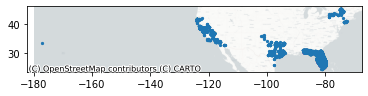

In [119]:
ax = gdf1.sample(10400).plot(markersize=5)
cx.add_basemap(ax, crs=gdf.crs,
               source = cx.providers.CartoDB.Positron)
ax.axis('on');

In [73]:
gdf1_do = gdf1.loc[(gdf1['CharacteristicName']=="Dissolved oxygen (DO)")] 

In [57]:
#data['Turbidity (NTU)'] = pd.to_numeric(data['Turbidity (NTU)'], errors='coerce')
gdf1_turb['ResultMeasureValue'] = pd.to_numeric(gdf1_turb['ResultMeasureValue'], errors='coerce')

In [ ]:
gdf1_do = gdf1.loc[(gdf1['CharacteristicName']=="Turbidity")] 
gdf1_turb['ResultMeasureValue'] = pd.to_numeric(gdf1_turb['ResultMeasureValue'], errors='coerce')

In [74]:
#hex_r = hex_r.dropna(subset=['count'])
gdf1_do = gdf1_do.dropna(subset=['ResultMeasureValue'])

In [75]:
gdf1_do

,geometry,CharacteristicName,MonitoringLocationIdentifier,ResultTemperatureBasisText,ResultMeasureValue,ResultMeasure/MeasureUnitCode
886,POINT (-77.51986 40.11250),Dissolved oxygen (DO),SRMTWRP_WQX-STLAWW,,0.020391575,mg/l
890,POINT (-77.51986 40.11250),Dissolved oxygen (DO),SRMTWRP_WQX-SR001W,,0.046245102,mg/l
894,POINT (-77.51986 40.11250),Dissolved oxygen (DO),SRMTWRP_WQX-HEL,,13.7732,mg/l
901,POINT (-77.51986 40.11250),Dissolved oxygen (DO),SRMTWRP_WQX-GRASW,,0.044952309,mg/l
904,POINT (-77.51986 40.11250),Dissolved oxygen (DO),SRMTWRP_WQX-GRASW,,0.091131163,mg/l
...,...,...,...,...,...,...
1927,POINT (-77.51986 40.11250),Dissolved oxygen (DO),SRMTWRP_WQX-STLAWW,,0.029151782,mg/l
1936,POINT (-77.51986 40.11250),Dissolved oxygen (DO),SRMTWRP_WQX-STLAWW,,9.986923077,mg/l
1939,POINT (-77.51986 40.11250),Dissolved oxygen (DO),SRMTWRP_WQX-HEL,,12.41,mg/l
1940,POINT (-77.51986 40.11250),Dissolved oxygen (DO),SRMTWRP_WQX-RAQSPR,,12.00607143,mg/l


In [61]:
bounding_box = gdf1_turb[['geometry']].dissolve().envelope[0]

In [62]:
bound_box_gdf_turb = gpd.GeoDataFrame(geometry=[bounding_box])

In [63]:
bound_box_gdf_turb.crs = gdf.crs

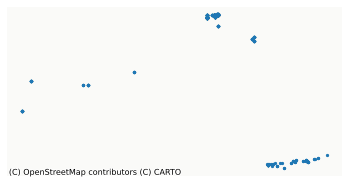

In [72]:
ax = gdf1_turb.plot(markersize=5)
cx.add_basemap(ax, crs=gdf.crs,
               source = cx.providers.CartoDB.Positron)
ax.axis('off');

In [71]:
grid

,geometry
0,"POLYGON ((-77.51987 40.11249, -77.51987 40.112..."
1,"POLYGON ((-77.51987 40.11249, -77.51987 40.112..."
2,"POLYGON ((-77.51987 40.11249, -77.51987 40.112..."
3,"POLYGON ((-77.51987 40.11249, -77.51987 40.112..."
4,"POLYGON ((-77.51987 40.11249, -77.51987 40.112..."
...,...
259,"POLYGON ((-77.51985 40.11250, -77.51985 40.112..."
260,"POLYGON ((-77.51985 40.11250, -77.51985 40.112..."
261,"POLYGON ((-77.51985 40.11250, -77.51985 40.112..."
262,"POLYGON ((-77.51985 40.11250, -77.51985 40.112..."


In [69]:
def make_grid(gdf, n_cells):
    gdf = gdf.copy()
    xmin, ymin, xmax, ymax= gdf.total_bounds
    cell_size = (xmax-xmin)/n_cells
    # create the cells in a loop
    grid_cells = []
    for x0 in np.arange(xmin, xmax+cell_size, cell_size ):
        for y0 in np.arange(ymin, ymax+cell_size, cell_size):
            x1 = x0-cell_size
            y1 = y0+cell_size
            grid_cells.append( shapely.geometry.box(x0, y0, x1, y1)  )
    grid = gpd.GeoDataFrame(grid_cells, columns=['geometry'], crs=gdf.crs)
    return grid

In [70]:
grid = make_grid(gdf1_turb, n_cells=20)

In [ ]:
def rasterize(gdf, grid, aggfunc="count", column=None, plot=True):
    merged = gpd.sjoin(gdf, grid, how='left', predicate='within').copy()
    if aggfunc == "count":
        column = 'count'
        output_col = column
        merged[column] = 1
    else:
        output_col = column + "_" + aggfunc   
    dissolved = merged.dissolve(by="index_right", aggfunc=aggfunc)[[column]]
    dissolved.columns = [output_col]
    grid.loc[dissolved.index, output_col] = dissolved[output_col].values
    if plot:
        ax = grid.plot(column=output_col, figsize=(12, 8), edgecolor="grey", legend=True)
        ax.axis('off')
        cx.add_basemap(ax,source=cx.providers.CartoDB.Positron,crs=gdf.crs)
        plt.show()
    return grid

In [ ]:
hex_grid = h3fy(bound_box_gdf, resolution=9)